In [ ]:
# Import necessary libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [10]:

# Load Digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dataset loaded:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Dataset loaded:
Training samples: 1437
Testing samples: 360


In [11]:

# Initialize base classifiers
clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier()

# Combine with VotingClassifier (hard voting)
voting_clf = VotingClassifier(estimators=[
    ('lr', clf1), ('dt', clf2), ('knn', clf3)
], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
acc_voting = accuracy_score(y_test, y_pred_voting)
print(f"Hard Voting Accuracy: {acc_voting:.4f}")


Hard Voting Accuracy: 0.9694


In [12]:

# Bagging with Decision Tree (updated for newer sklearn versions)
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
acc_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {acc_bagging:.4f}")


Bagging Accuracy: 0.9250


In [13]:
# Improved AdaBoost with deeper base estimators
adaboost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=100,
    algorithm='SAMME',  # Optional: use this if you want to silence future warnings
    random_state=42
)
adaboost_clf.fit(X_train, y_train)
y_pred_adaboost = adaboost_clf.predict(X_test)
acc_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"Improved AdaBoost Accuracy: {acc_adaboost:.4f}")


Improved AdaBoost Accuracy: 0.9417


In [14]:

# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {acc_gb:.4f}")


Gradient Boosting Accuracy: 0.9556


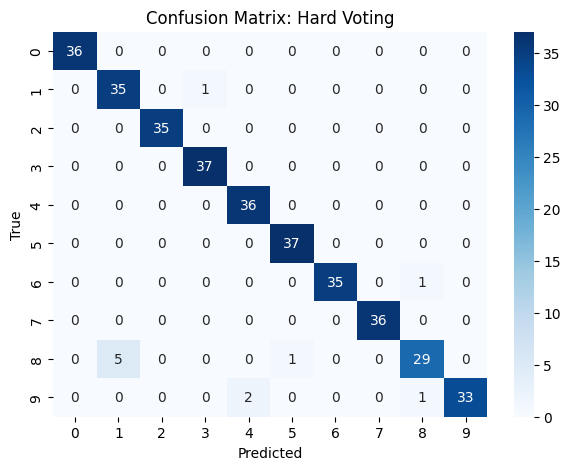

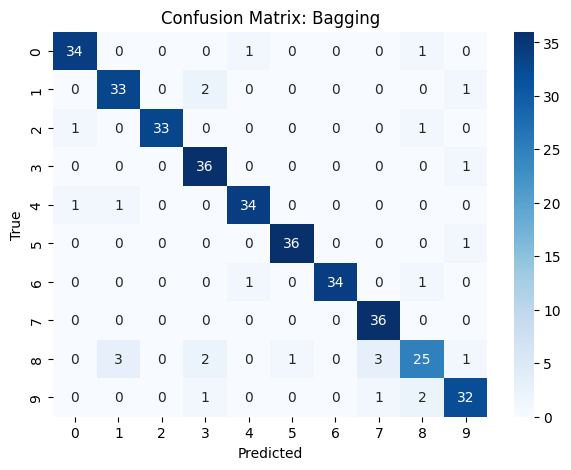

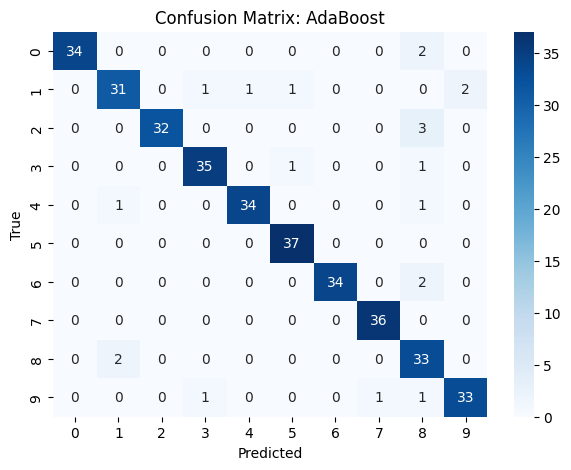

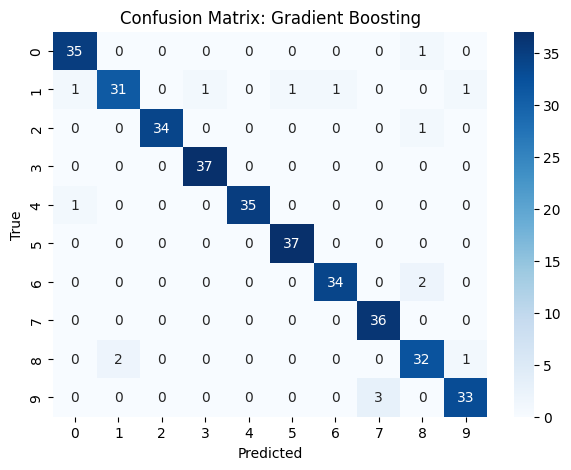

In [15]:

def plot_conf_matrix(y_true, y_pred, title):
    plt.figure(figsize=(7,5))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

plot_conf_matrix(y_test, y_pred_voting, "Confusion Matrix: Hard Voting")
plot_conf_matrix(y_test, y_pred_bagging, "Confusion Matrix: Bagging")
plot_conf_matrix(y_test, y_pred_adaboost, "Confusion Matrix: AdaBoost")
plot_conf_matrix(y_test, y_pred_gb, "Confusion Matrix: Gradient Boosting")


In [16]:

print("=== Classification Report: Hard Voting ===")
print(classification_report(y_test, y_pred_voting))

print("=== Classification Report: Bagging ===")
print(classification_report(y_test, y_pred_bagging))

print("=== Classification Report: AdaBoost ===")
print(classification_report(y_test, y_pred_adaboost))

print("=== Classification Report: Gradient Boosting ===")
print(classification_report(y_test, y_pred_gb))


=== Classification Report: Hard Voting ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.88      0.97      0.92        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.95      1.00      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.94      0.83      0.88        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

=== Classification Report: Bagging ===
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.89      0.92      0.90       